**데이터 분석**

1. 분석/모델링을 위한 <span style="color:red">**데이터구조**</span>를 이해한다.
2. 정보의 종류(숫자, 범주)에 따라  <span style="color:red">**데이터의 분포**</span>를 확인하고  <span style="color:red">**비즈니스를 파악**</span>할 수 있다
3. 두 정보를 분석할 때, 적절한 도구를 사용하여  <span style="color:red">**관계를 파악**</span>해 낼 수 있다.

$ $

$ $

 **정리된 데이터셋을 가지고 분석하는 방법**
 1) Exploratory Data Analysis 탐색적 데이터 분석
 2) Comfirmatory Data Analysis 확증적 데이터 분석

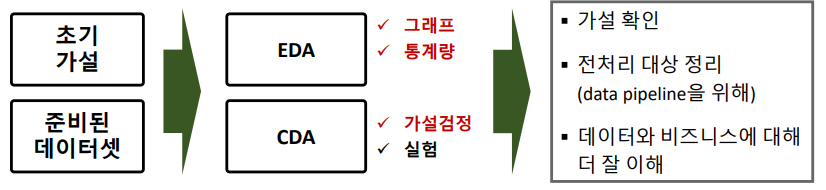

**EDA 및 CDA 진행 순서**
1) 단변량 분석: 개별 변수의 분포
2) 이변량 분석1: feature과 target간의 관계(가설을 확인하는 단계)
3) 이변량 분석2: feature들 간의 관계

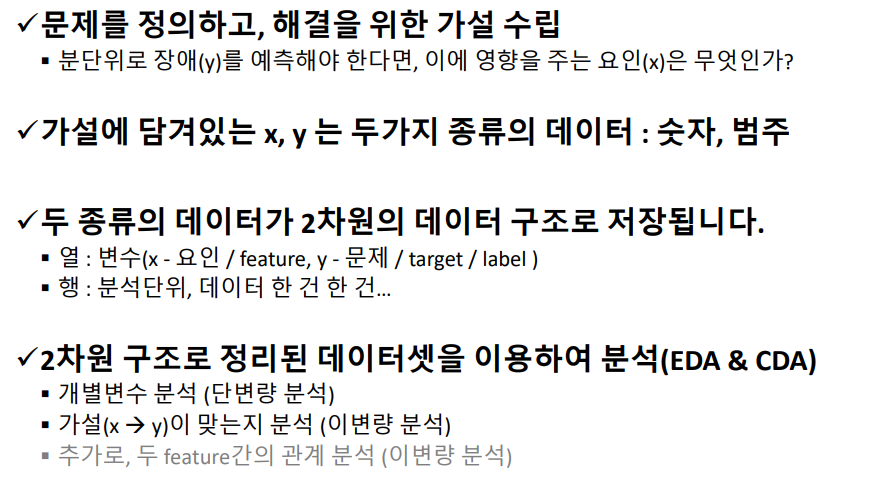

# 1. 시각화라이브러리 : matplotlib, seaborn

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple2.csv'
data = pd.read_csv(path)
data['Date'] = pd.to_datetime(data['Date'])
data.dropna(axis = 0, inplace = True)
data.head()


## 1) 기본차트 그리기
* plt.plot(x, y, data= )
    * x축 : 인덱스
    * y축 : 1차원 값
    * 라인차트를 그려줍니다.

In [ ]:
# data의 'Temp'값 차트 그리기
plt.plot(data['Temp'])

# 화면에 보여주기
plt.show()

In [ ]:
# x='Date', y='Temp'인 차트1
plt.plot(data['Date'], data['Temp'])
plt.show()

In [ ]:
# x='Date', y='Temp'인 차트2
plt.plot('Date', 'Temp', data = data)
plt.show()

## 2) 차트 꾸미기
https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

x축, y축, 타이틀 이름 지정

In [ ]:
plt.plot(data['Date'], data['Ozone'])

plt.xticks(rotation = 45)       # x축 값 꾸미기 : 방향을 45도 틀어서
plt.xlabel('Date')              # x축 이름 지정
plt.ylabel('Ozone')             # y축 이름 지정
plt.title('Daily Airquality')   # 타이틀

plt.show()

라인 스타일 조정

* color=  
    * 'red','green','blue' ...
    * 혹은 'r', 'g', 'b', ...
    * https://matplotlib.org/stable/gallery/color/named_colors.html
* linestyle= 
    * 'solid', 'dashed', 'dashdot', 'dotted'
    * 혹은 '-' , '--' , '-.' , ':' 
* marker=

| marker |	description |
| ---- | ---- |
|"." |	point |
|"," |	pixel |
|"o" |	circle |
|"v" |	triangle_down |
|"^" |	triangle_up |
|"<" |	triangle_left |
|">" |	triangle_right |

In [ ]:
## 연습

plt.plot(data['Date'], data['Ozone'],
        color='tan',
        linestyle='dashdot',
        marker='<')

plt.xlabel('Date') 
plt.ylabel('Ozone')
plt.title('Daily Airquality')
plt.xticks(rotation=45)

plt.show()

In [ ]:
## 연습 
plt.plot(data['Date'], data['Temp'],
        color='indianred',
        linestyle='dotted',
        marker='o')


plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Airquality')
plt.xticks(rotation=45)

plt.show()

여러 그래프 겹쳐서 그리기

In [ ]:
# 첫번째 그래프
plt.plot(data['Date'], data['Ozone'], 
         color='tan', 
         linestyle='dotted', 
         marker='o')

# 두번째 그래프 
plt.plot(data['Date'], data['Temp'], 
         color='rosybrown', 
         linestyle='-', 
         marker='s')


plt.xlabel('Date') 
plt.ylabel('Ozone')
plt.title('Daily Airquality')
plt.xticks(rotation=45)


plt.show()

In [ ]:
# 범례, 그리드 추가
# 첫번째 그래프
plt.plot(data['Date'], data['Ozone'], label = 'Ozone',    # label= : 범례추가를 위한 레이블값
         color='tan', 
         linestyle='dotted', 
         marker='o')

# 두번째 그래프 
plt.plot(data['Date'], data['Temp'], label='Temp',
         color='rosybrown', 
         linestyle='-', 
         marker='s')


plt.xlabel('Date') 
plt.ylabel('Ozone')
plt.title('Daily Airquality')
plt.xticks(rotation=45)
plt.legend(loc='upper right')


plt.show()


$ $

## 3) 추가기능
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

#### 1) df.plot()

In [ ]:
data.plot(x='Date', y=['Temp', 'Ozone'], title='Daily Airquality')
plt.grid()
plt.show()

# 데이터프레임으로부터 바로 그래프 그릴 수 있음.
# 범례(legend)값과 x축(xlabel)은 딸려 온다.

#### 2) 축 범위 조정하기

In [ ]:
# plt.xlim(), plt.ylim()

plt.plot(data['Ozone'])

plt.ylim(0, 100)  # y축 범위
plt.xlim(0,10)    # x축 범위
plt.grid()
plt.show()

#### 3) 그래프 크기 조정
    - plt.figure(figsize = (?, ?))

In [ ]:
plt.figure(figsize = (4, 3))

plt.plot(data['Ozone'])

plt.ylim(0, 100)
plt.xlim(0,10)

plt.grid()
plt.show()

In [ ]:
  # 그래프 코드 순서
  #    1. 크기 조정: plt.figure(figsize=(?, ?))
  #    1-2 여러 그래프 나눠서 그리기: plt.subplot(row=, column=, index=)
  #    2. 그래프 그리기: plt.plot()
  #    3. 꾸미기: ...
  #    4. 이제는 보여줘: plt.show()

#### 4) 수평선 수직선 추가
    - plt.axhline(?, color='', linestyle='')  -> 수평선
    - plt.axvline(?, color='', linestyle='')  -> 수직선

In [ ]:
plt.plot(data['Ozone'])

plt.axhline(40, color = 'grey', linestyle = '--')
plt.axvline(10, color = 'red', linestyle = '--')
plt.show()

#### 5) 그래프에 텍스트 추가
    - plt.text(x좌표값, y좌표값, '글자')

In [ ]:
plt.plot(data['Ozone'])

plt.axhline(40, color = 'grey', linestyle = '--')
plt.axvline(10, color = 'red', linestyle = '--')

plt.text(5, 41, '40')
plt.text(10.1, 20, '10')

plt.show()

#### 6) 여러그래프 나눠서 그리기

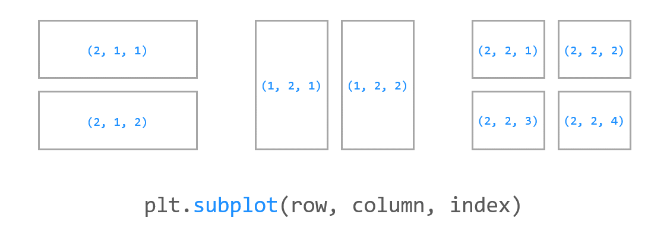

In [ ]:
# 3행 1열 3개 만들기
plt.figure(figsize = (12,8))
plt.subplot(3,1,1)
plt.plot('Date', 'Temp', data = data)
plt.grid()

plt.subplot(3,1,2)
plt.plot('Date', 'Wind', data = data)

plt.subplot(3,1,3)
plt.plot('Date', 'Ozone', data = data)
plt.grid()
plt.ylabel('Ozone')

plt.tight_layout() # 그래프간 간격을 적절히 맞추기
plt.show()

In [ ]:
# 1행 3열 3개 만들기
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot('Date', 'Temp', data = data)
plt.title('Temp')
plt.xticks(rotation = 40)
plt.grid()

plt.subplot(1,3,2)
plt.plot('Date', 'Wind', data = data)
plt.title('Wind')
plt.xticks(rotation = 40)
plt.grid()

plt.subplot(1,3,3)
plt.plot('Date', 'Ozone', data = data)
plt.title('Ozone')
plt.xticks(rotation = 40)
plt.grid()

plt.tight_layout() # 그래프간 간격을 적절히 맞추기
plt.show()


In [ ]:
# for문 도려서 시각화 하기. enumerate 사용

plt.figure(figsize=(15,5))

vars = ['Temp', 'Wind', 'Ozone']
for i, v in enumerate(vars):
    plt.subplot(1,3,i+1)
    plt.plot('Date', v, data=data)
    plt.title(v)
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()

plt.show()